In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np

In [2]:
# import chardet

# # Detect the encoding
# with open("BaseDPEvolucaoMensalCisp.csv", 'rb') as f:
#     result = chardet.detect(f.read())
#     print(result)

# # Use the detected encoding
# df = pd.read_csv("BaseDPEvolucaoMensalCisp.csv", sep=";", encoding=result['encoding'])

In [3]:
df = pd.read_csv("BaseDPEvolucaoMensalCisp.csv", sep = ";", encoding = "ISO-8859-1") 
df.columns

Index(['cisp', 'mes', 'ano', 'mes_ano', 'aisp', 'risp', 'munic', 'mcirc',
       'regiao', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 'cvli',
       'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_transeunte', 'roubo_celular', 'roubo_em_coletivo', 'roubo_rua',
       'roubo_veiculo', 'roubo_carga', 'roubo_comercio', 'roubo_residencia',
       'roubo_banco', 'roubo_cx_eletronico', 'roubo_conducao_saque',
       'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos',
       'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34848 entries, 0 to 34847
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cisp                        34848 non-null  int64  
 1   mes                         34848 non-null  int64  
 2   ano                         34848 non-null  int64  
 3   mes_ano                     34848 non-null  object 
 4   aisp                        34848 non-null  int64  
 5   risp                        34848 non-null  int64  
 6   munic                       34848 non-null  object 
 7   mcirc                       34848 non-null  int64  
 8   regiao                      34848 non-null  object 
 9   hom_doloso                  34848 non-null  int64  
 10  lesao_corp_morte            34848 non-null  int64  
 11  latrocinio                  34848 non-null  int64  
 12  cvli                        34848 non-null  int64  
 13  hom_por_interv_policial     348

Pensar na letalidade dos crimes junto a intervenções policiais

Descrição estatística dos crimes violentos:
       letalidade_violenta    hom_doloso  lesao_corp_morte  \
count         34848.000000  34848.000000      34848.000000   
mean              3.763114      3.008379          0.027089   
std               5.342166      4.413778          0.176733   
min               0.000000      0.000000          0.000000   
25%               0.000000      0.000000          0.000000   
50%               2.000000      1.000000          0.000000   
75%               5.000000      4.000000          0.000000   
max              52.000000     43.000000          6.000000   

       hom_por_interv_policial  
count             34848.000000  
mean                  0.629448  
std                   1.577965  
min                   0.000000  
25%                   0.000000  
50%                   0.000000  
75%                   0.000000  
max                  27.000000  

Matriz de correlação entre os crimes violentos:
                         letalidade_violenta  hom_d

<Figure size 1000x600 with 0 Axes>

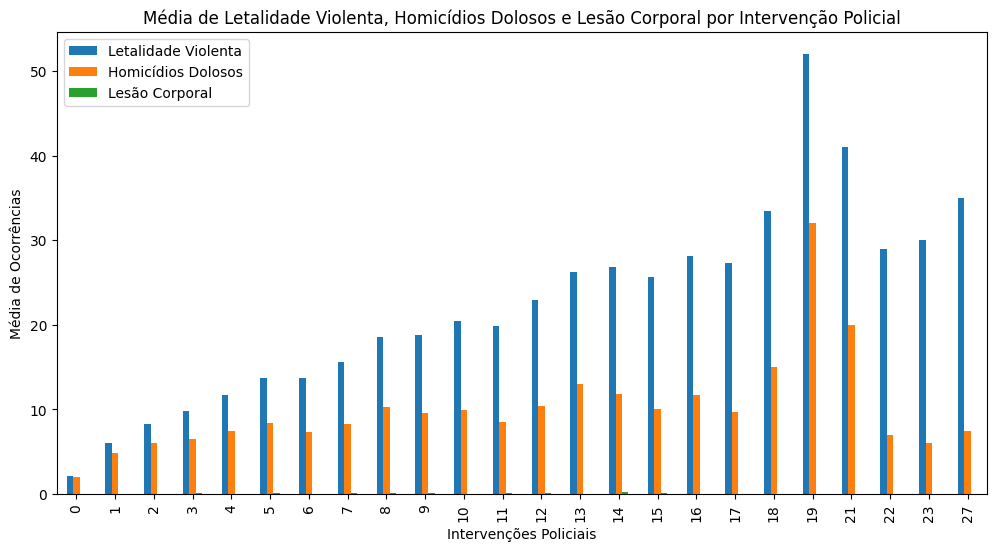

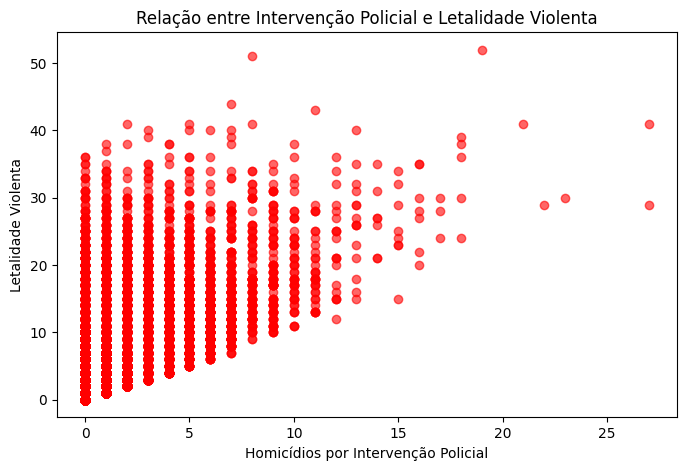

In [5]:
# Filtrar as colunas relevantes para a análise
cols = ['letalidade_violenta', 'hom_doloso', 'lesao_corp_morte', 'hom_por_interv_policial']
df_violencia = df[cols]

# Análise Descritiva
print("Descrição estatística dos crimes violentos:")
print(df_violencia.describe())

# Correlação entre os crimes violentos
correlation_matrix = df_violencia.corr()
print("\nMatriz de correlação entre os crimes violentos:")
print(correlation_matrix)

# Plotar gráficos de comparação
plt.figure(figsize=(10, 6))

# Comparar Letalidade Violenta com Homicídios Dolosos, Lesão Corporal seguida de Morte e Intervenção Policial
df_violencia.groupby('hom_por_interv_policial')[['letalidade_violenta', 'hom_doloso', 'lesao_corp_morte']].mean().plot(kind='bar', figsize=(12, 6))
plt.title('Média de Letalidade Violenta, Homicídios Dolosos e Lesão Corporal por Intervenção Policial')
plt.xlabel('Intervenções Policiais')
plt.ylabel('Média de Ocorrências')
plt.legend(['Letalidade Violenta', 'Homicídios Dolosos', 'Lesão Corporal'])
plt.show()

# Plotar Letalidade Violenta por Intervenção Policial
plt.figure(figsize=(8, 5))
plt.scatter(df['hom_por_interv_policial'], df['letalidade_violenta'], color='r', alpha=0.6)
plt.title('Relação entre Intervenção Policial e Letalidade Violenta')
plt.xlabel('Homicídios por Intervenção Policial')
plt.ylabel('Letalidade Violenta')
plt.show()

Analisar crimes violentos ao longo dos anos e ver a diferença entre momentos de ferias e não de ferias (CREIO QUE TEM ALGUM ERRO NA DE FERIAS PQ TA IGUAL O GRAFICO PRAS DUAS COLUNAS)

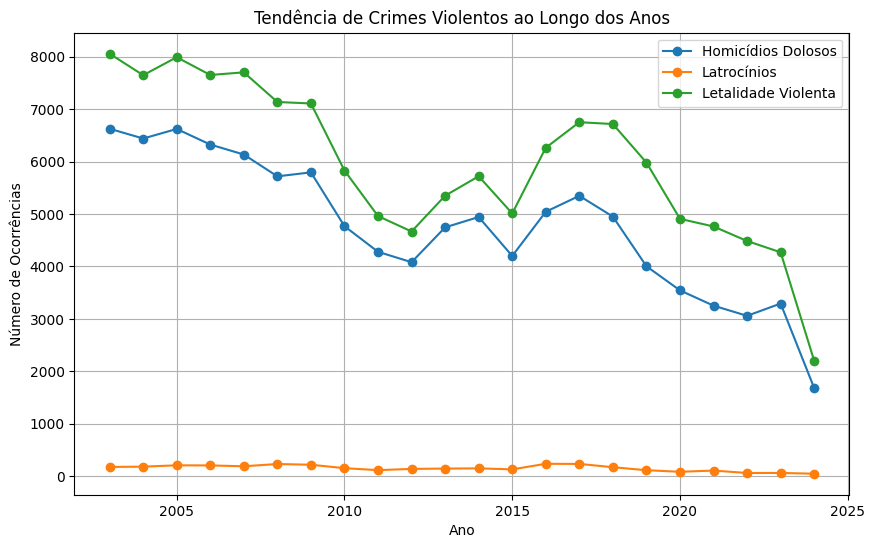

C:\Users\Diego\AppData\Local\Temp\ipykernel_15048\479839723.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crimes['ferias'] = df_crimes['mes'].apply(lambda x: 1 if x in ferias_meses else 0)


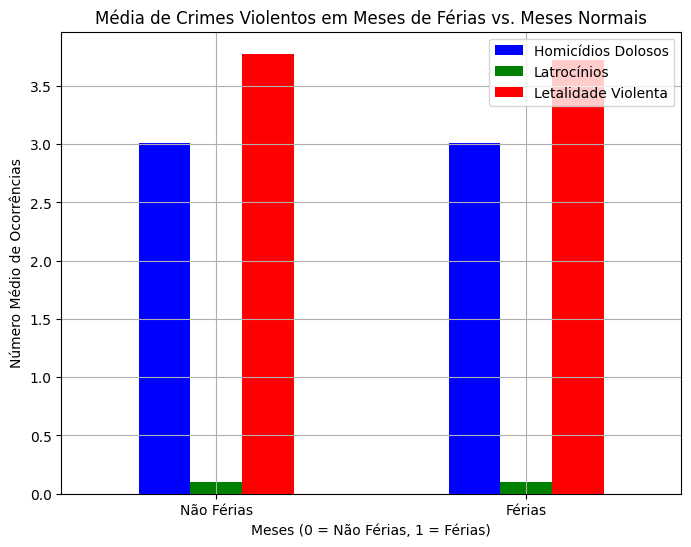

In [6]:
# Filtrar as colunas relevantes para a análise
cols = ['mes', 'ano', 'hom_doloso', 'latrocinio', 'letalidade_violenta']
df_crimes = df[cols]

# Tendência temporal (Análise de Crimes Violentos ao longo dos anos)
df_ano = df_crimes.groupby('ano')[['hom_doloso', 'latrocinio', 'letalidade_violenta']].sum()

# Plotar a tendência temporal
df_ano.plot(figsize=(10, 6), marker='o')
plt.title('Tendência de Crimes Violentos ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Ocorrências')
plt.legend(['Homicídios Dolosos', 'Latrocínios', 'Letalidade Violenta'])
plt.grid(True)
plt.show()

# Sazonalidade: Comparar férias escolares com outros meses
# Identificar férias escolares (dezembro, janeiro e julho)
ferias_meses = [12, 1, 7]

# Criar uma nova coluna que indica se o mês está nas férias escolares
df_crimes['ferias'] = df_crimes['mes'].apply(lambda x: 1 if x in ferias_meses else 0)

# Comparar crimes violentos entre meses de férias e não-férias
df_ferias = df_crimes.groupby('ferias')[['hom_doloso', 'latrocinio', 'letalidade_violenta']].mean()

# Plotar comparações de crimes violentos entre meses de férias e não-férias
df_ferias.plot(kind='bar', figsize=(8, 6), color=['b', 'g', 'r'])
plt.title('Média de Crimes Violentos em Meses de Férias vs. Meses Normais')
plt.xlabel('Meses (0 = Não Férias, 1 = Férias)')
plt.ylabel('Número Médio de Ocorrências')
plt.xticks(ticks=[0, 1], labels=['Não Férias', 'Férias'], rotation=0)
plt.legend(['Homicídios Dolosos', 'Latrocínios', 'Letalidade Violenta'])
plt.grid(True)
plt.show()

Análise entre pessoas desaparecidas e sequestros

Correlação entre sequestro e pessoas desaparecidas:
                       sequestro  pessoas_desaparecidas
sequestro               1.000000               0.044746
pessoas_desaparecidas   0.044746               1.000000


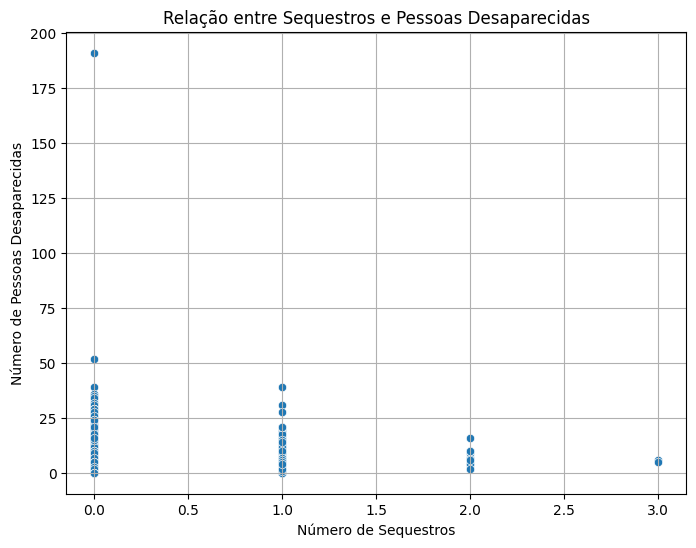

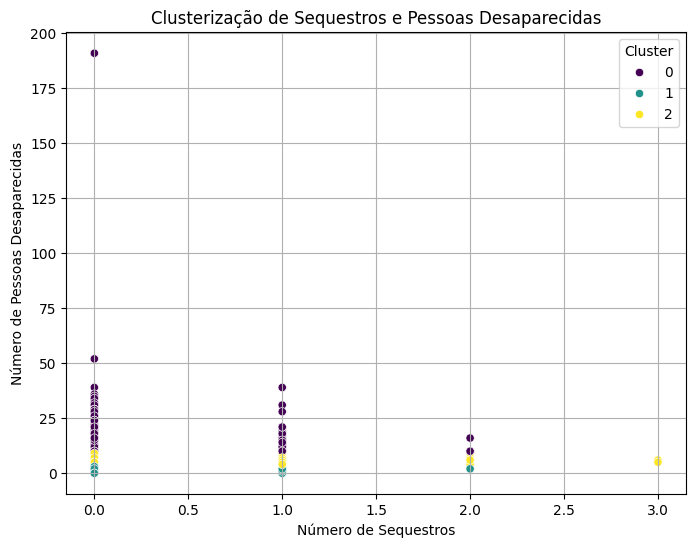

Distribuição dos clusters:
cluster
1    23370
2     9021
0     2457
Name: count, dtype: int64

Estatísticas descritivas por cluster:
         sequestro  pessoas_desaparecidas
cluster                                  
0         0.011396              14.274725
1         0.002182               1.049893
2         0.006208               5.675867


In [7]:
# Filtrar as colunas relevantes para a análise
df_sequestro = df[['sequestro', 'pessoas_desaparecidas']]

# Verificar correlação entre sequestros e desaparecimentos
correlation = df_sequestro.corr()
print("Correlação entre sequestro e pessoas desaparecidas:")
print(correlation)

# Plotar a correlação com um gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sequestro', y='pessoas_desaparecidas', data=df_sequestro)
plt.title('Relação entre Sequestros e Pessoas Desaparecidas')
plt.xlabel('Número de Sequestros')
plt.ylabel('Número de Pessoas Desaparecidas')
plt.grid(True)
plt.show()

# Clusterização K-Means
# Remover valores nulos para a clusterização
df_sequestro = df_sequestro.dropna()

# Aplicar K-Means com 3 clusters (ajustável conforme necessidade)
kmeans = KMeans(n_clusters=3, random_state=42)
df_sequestro['cluster'] = kmeans.fit_predict(df_sequestro[['sequestro', 'pessoas_desaparecidas']])

# Visualizar os clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sequestro', y='pessoas_desaparecidas', hue='cluster', palette='viridis', data=df_sequestro)
plt.title('Clusterização de Sequestros e Pessoas Desaparecidas')
plt.xlabel('Número de Sequestros')
plt.ylabel('Número de Pessoas Desaparecidas')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Analisar a distribuição dos clusters
print("Distribuição dos clusters:")
print(df_sequestro['cluster'].value_counts())

# Estatísticas descritivas por cluster
cluster_description = df_sequestro.groupby('cluster')[['sequestro', 'pessoas_desaparecidas']].mean()
print("\nEstatísticas descritivas por cluster:")
print(cluster_description)

Análise entre furto e roubos de carros e recuperação de veículos

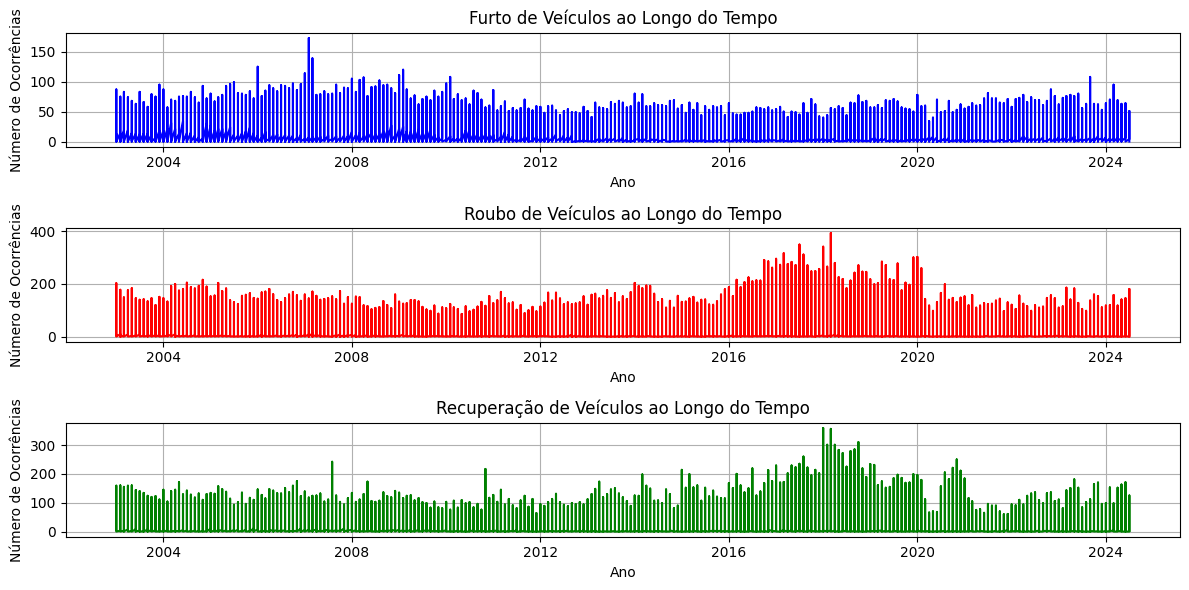

In [8]:
# Converter a coluna 'mes_ano' do formato '2003m01' para um formato de data
df['mes_ano'] = pd.to_datetime(df['mes_ano'].str.replace('m', ''), format='%Y%m')

# Filtrar as colunas relevantes para a análise
cols = ['mes_ano', 'furto_veiculos', 'roubo_veiculo', 'recuperacao_veiculos']
df_veiculos = df[cols]

# Configurar o tamanho da figura para os gráficos
plt.figure(figsize=(12, 6))

# Gráfico de Furto de Veículos
plt.subplot(3, 1, 1)  # 3 linhas, 1 coluna, posição 1
plt.plot(df_veiculos['mes_ano'], df_veiculos['furto_veiculos'], color='b', label='Furto de Veículos')
plt.title('Furto de Veículos ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Número de Ocorrências')
plt.grid(True)

# Gráfico de Roubo de Veículos
plt.subplot(3, 1, 2)  # 3 linhas, 1 coluna, posição 2
plt.plot(df_veiculos['mes_ano'], df_veiculos['roubo_veiculo'], color='r', label='Roubo de Veículos')
plt.title('Roubo de Veículos ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Número de Ocorrências')
plt.grid(True)

# Gráfico de Recuperação de Veículos
plt.subplot(3, 1, 3)  # 3 linhas, 1 coluna, posição 3
plt.plot(df_veiculos['mes_ano'], df_veiculos['recuperacao_veiculos'], color='g', label='Recuperação de Veículos')
plt.title('Recuperação de Veículos ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Número de Ocorrências')
plt.grid(True)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()


Progressão de crimes não violentos ao longo dos anos

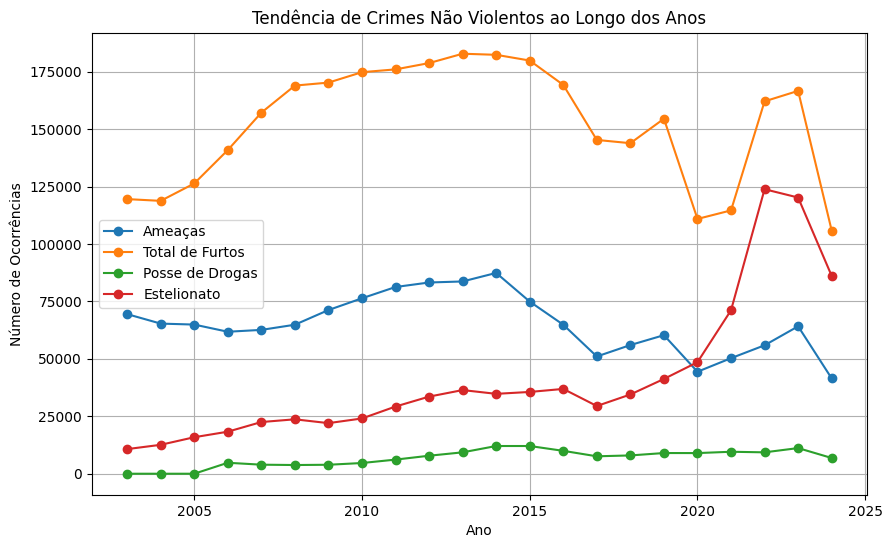

In [9]:
# Filtrar as colunas relevantes para a análise de crimes não violentos
cols_nao_violentos = ['mes', 'ano', 'ameaca', 'total_furtos', 'posse_drogas', 'estelionato']
df_nao_violentos = df[cols_nao_violentos]

# Tendência temporal (Análise de Crimes Não Violentos ao longo dos anos)
df_nao_violentos_ano = df_nao_violentos.groupby('ano')[['ameaca', 'total_furtos', 'posse_drogas', 'estelionato']].sum()

# Plotar a tendência temporal de crimes não violentos
import matplotlib.pyplot as plt

df_nao_violentos_ano.plot(figsize=(10, 6), marker='o')
plt.title('Tendência de Crimes Não Violentos ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Ocorrências')
plt.legend(['Ameaças', 'Total de Furtos', 'Posse de Drogas', 'Estelionato'])
plt.grid(True)
plt.show()

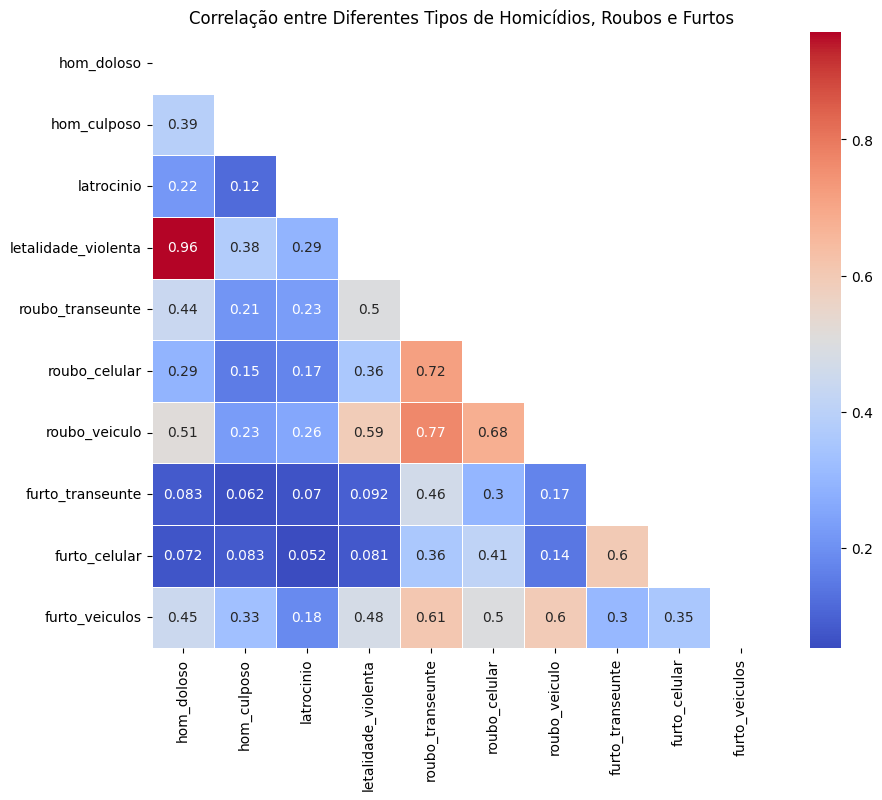

In [10]:
# Definir as colunas que representam diferentes tipos de homicídios, roubos e furtos
cols_homicidios = ['hom_doloso', 'hom_culposo', 'latrocinio', 'letalidade_violenta']
cols_roubos = ['roubo_transeunte', 'roubo_celular', 'roubo_veiculo']
cols_furtos = ['furto_transeunte', 'furto_celular', 'furto_veiculos']

# Filtrar o dataframe para conter apenas esses tipos de crimes
df_tipos_crimes = df[cols_homicidios + cols_roubos + cols_furtos]

# Calcular a correlação entre os diferentes tipos de homicídios, roubos e furtos
correlation_matrix_tipos = df_tipos_crimes.corr()

# Criar uma máscara para a matriz triangular superior
mask = np.triu(np.ones_like(correlation_matrix_tipos, dtype=bool))

# Plotar um mapa de calor para visualizar a correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_tipos, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlação entre Diferentes Tipos de Homicídios, Roubos e Furtos')
plt.show()

In [11]:
df_regioes = pd.read_csv("Relacao_RISPxAISPxCISP.csv", sep = ";", encoding = "ISO-8859-1") 
df_regioes.columns

Index(['RISP', 'AISP', 'CISP', 'Unidade Territorial', 'Município',
       'Região de Governo'],
      dtype='object')

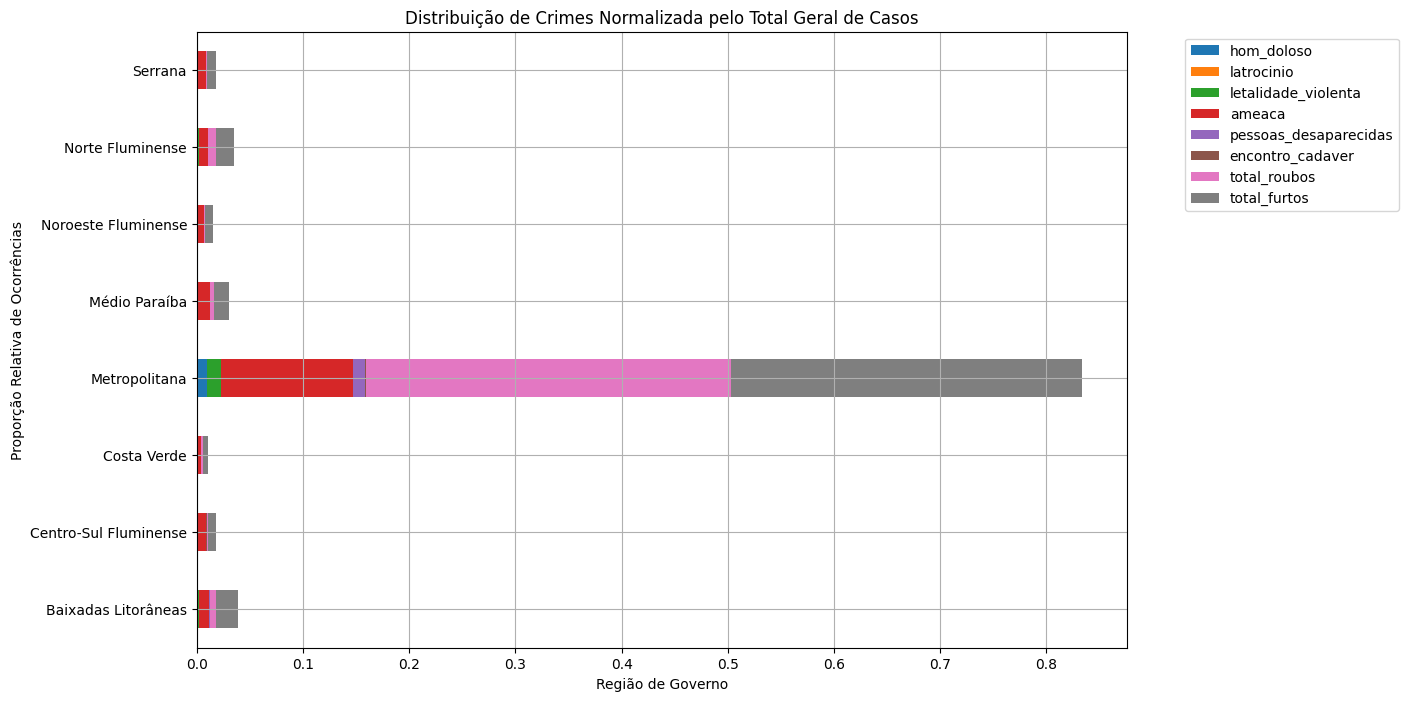

In [12]:
# Definir as colunas para análise de crimes por regiões (CISP ou bairro)
cols_crimes = ['hom_doloso', 'latrocinio', 'letalidade_violenta', 'ameaca', 'pessoas_desaparecidas', 'encontro_cadaver', 'total_roubos', 'total_furtos']

# Primeiro, renomeamos a coluna 'CISP' no df_regioes para combinar com o nome da coluna no df de crimes, se necessário
df_regioes.rename(columns={'CISP': 'cisp'}, inplace=True)

# Agora fazemos a junção (merge) entre os dois DataFrames, usando 'cisp' como chave
df_combinado = pd.merge(df, df_regioes[['cisp', 'Região de Governo']], on='cisp', how='left')

# Agora podemos agrupar os crimes pela 'Região de Governo'
df_crimes_regioes_gov = df_combinado.groupby('Região de Governo')[cols_crimes].sum()

# Calcular o total geral de crimes em todas as regiões (soma de todos os crimes)
total_geral_crimes = df_crimes_regioes_gov[cols_crimes].sum().sum()

# Normalizar dividindo o número de ocorrências de cada tipo de crime pelo total geral de crimes
df_crimes_regioes_normalizado_total = df_crimes_regioes_gov[cols_crimes] / total_geral_crimes

# Plotar a distribuição de crimes normalizada pelo total geral de casos
df_crimes_regioes_normalizado_total.plot(kind='barh', stacked=True, figsize=(12, 8))
plt.title('Distribuição de Crimes Normalizada pelo Total Geral de Casos')
plt.xlabel('Região de Governo')
plt.ylabel('Proporção Relativa de Ocorrências')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()


In [13]:
import pandas as pd
import folium

# Carregar o dataset com as coordenadas
coord = pd.read_csv("coordenadas.csv", delimiter=',', encoding='latin1')
coord.rename(columns={'Nome do Local': 'Nome do Bairro'}, inplace=True)

# Suponha que df_combinado já tenha sido carregado previamente com as informações de crimes
df_combinado = pd.merge(df, df_regioes[['cisp', 'Unidade Territorial']], on='cisp', how='left')

# Extrair apenas o primeiro nome da coluna "Unidade Territorial", considerando vírgulas, parênteses e " e "
df_combinado["bairro"] = df_combinado["Unidade Territorial"].str.split(r"[,\\(]|\s+e\s+").str[0].str.strip()

# Mesclar df_combinado com o dataframe coord para adicionar as coordenadas
df_combinado = pd.merge(df_combinado, coord[['Nome do Bairro', 'Latitude', 'Longitude']], left_on='bairro', right_on='Nome do Bairro', how='left')

# Exibir o resultado processado
print(df_combinado[["bairro", "registro_ocorrencias", "Latitude", "Longitude"]])

# Filtrar bairros com coordenadas válidas
df_combinado = df_combinado.dropna(subset=["Latitude", "Longitude"])

# Criar o mapa
m = folium.Map(location=[-22.9068, -43.1729], zoom_start=12)

# Adicionar marcadores no mapa
for _, row in df_combinado.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=row["registro_ocorrencias"] / 100,  # Ajustar o tamanho
        color="red",
        fill=True,
        fill_opacity=0.6,
        popup=f"{row['bairro']}: {row['registro_ocorrencias']} ocorrências"
    ).add_to(m)

# Salvar e exibir o mapa
#m.save("mapa_crimes.html")
#m  # Apenas para notebooks
# Exibir no notebook
from IPython.display import display
#display(m)


KeyError: "['Nome do Bairro'] not in index"